In [64]:
import requests

In [65]:
juliusURLString = "https://www.gutenberg.org/cache/epub/1522/pg1522.txt"
r = requests.get(juliusURLString,allow_redirects=True)
jText = r.text

In [66]:
jActs = jText.split('ACT')[6:11]
# index range [6,10] are the ones that actually contain the contents of the play

charList = [
        'FLAVIUS','CARPENTER','MARULLUS','COBBLER'
        'CASCA','CALPHURNIA','ANTONY','SOOTHSAYER',
        'CICERO','CINNA','BRUTUS','LUCIUS','DECIUS',
        'METELLUS','LIGARIUS','SERVANT','ARTEMIDORUS',
        'PORTIA','PUBLIUS','POPILIUS','FIRST CITIZEN','SECOND CITIZEN',
        'THIRD CITIZEN','FOURTH CITIZEN','CITIZENS','OCTAVIUS','LEPIDUS',
        'POET','MESSALA','VARRO','MESSENGER','PINDARUS','TITINIUS','CATO',
        'VOLUMNIUS','CLITUS','STRATO'
]

In [91]:
# My graph will resemble a central node which represents Ceasar, connected to the people the he references, as well as the people that reference him
# I thought this was fitting seeing how this play is cenetered around Ceasar
connections = {}
for act in jActs:
    if act.find('CAESAR') != -1:
        for char in charList:
            if act.find(char) != -1:
                connections[('CAESAR',char)] = connections[('CAESAR',char)] + 1 if ('CAESAR',char) in connections else 1

In [92]:
graphitems = []

for k,v in connections.items():
    dashnode = {'data': {'id': k,
                         'label': 'Caesar w/' + str(k[1]),
                         'size': str(v)}}
    graphitems.append(dashnode)
    
graphitems

[{'data': {'id': ('CAESAR', 'FLAVIUS'),
   'label': 'Caesar w/FLAVIUS',
   'size': '1'}},
 {'data': {'id': ('CAESAR', 'CARPENTER'),
   'label': 'Caesar w/CARPENTER',
   'size': '1'}},
 {'data': {'id': ('CAESAR', 'MARULLUS'),
   'label': 'Caesar w/MARULLUS',
   'size': '1'}},
 {'data': {'id': ('CAESAR', 'CALPHURNIA'),
   'label': 'Caesar w/CALPHURNIA',
   'size': '2'}},
 {'data': {'id': ('CAESAR', 'ANTONY'),
   'label': 'Caesar w/ANTONY',
   'size': '4'}},
 {'data': {'id': ('CAESAR', 'SOOTHSAYER'),
   'label': 'Caesar w/SOOTHSAYER',
   'size': '3'}},
 {'data': {'id': ('CAESAR', 'CICERO'),
   'label': 'Caesar w/CICERO',
   'size': '1'}},
 {'data': {'id': ('CAESAR', 'CINNA'), 'label': 'Caesar w/CINNA', 'size': '3'}},
 {'data': {'id': ('CAESAR', 'BRUTUS'),
   'label': 'Caesar w/BRUTUS',
   'size': '4'}},
 {'data': {'id': ('CAESAR', 'LUCIUS'),
   'label': 'Caesar w/LUCIUS',
   'size': '1'}},
 {'data': {'id': ('CAESAR', 'DECIUS'),
   'label': 'Caesar w/DECIUS',
   'size': '2'}},
 {'data': {'

In [93]:
import networkx as nx
import matplotlib.pyplot as plt

In [94]:
nxgraphitems = []

for k,v in connections.items():
    if v != 0:
        dashedge = (k[0],k[1])
        nxgraphitems.append(dashedge)
    
nxgraphitems

[('CAESAR', 'FLAVIUS'),
 ('CAESAR', 'CARPENTER'),
 ('CAESAR', 'MARULLUS'),
 ('CAESAR', 'CALPHURNIA'),
 ('CAESAR', 'ANTONY'),
 ('CAESAR', 'SOOTHSAYER'),
 ('CAESAR', 'CICERO'),
 ('CAESAR', 'CINNA'),
 ('CAESAR', 'BRUTUS'),
 ('CAESAR', 'LUCIUS'),
 ('CAESAR', 'DECIUS'),
 ('CAESAR', 'METELLUS'),
 ('CAESAR', 'LIGARIUS'),
 ('CAESAR', 'SERVANT'),
 ('CAESAR', 'ARTEMIDORUS'),
 ('CAESAR', 'PORTIA'),
 ('CAESAR', 'PUBLIUS'),
 ('CAESAR', 'POPILIUS'),
 ('CAESAR', 'FIRST CITIZEN'),
 ('CAESAR', 'SECOND CITIZEN'),
 ('CAESAR', 'THIRD CITIZEN'),
 ('CAESAR', 'FOURTH CITIZEN'),
 ('CAESAR', 'CITIZENS'),
 ('CAESAR', 'OCTAVIUS'),
 ('CAESAR', 'MESSALA'),
 ('CAESAR', 'MESSENGER'),
 ('CAESAR', 'PINDARUS'),
 ('CAESAR', 'TITINIUS'),
 ('CAESAR', 'CATO'),
 ('CAESAR', 'VOLUMNIUS'),
 ('CAESAR', 'CLITUS'),
 ('CAESAR', 'STRATO')]

In [95]:
G = nx.Graph()
G.add_edges_from(nxgraphitems)
G.nodes

NodeView(('CAESAR', 'FLAVIUS', 'CARPENTER', 'MARULLUS', 'CALPHURNIA', 'ANTONY', 'SOOTHSAYER', 'CICERO', 'CINNA', 'BRUTUS', 'LUCIUS', 'DECIUS', 'METELLUS', 'LIGARIUS', 'SERVANT', 'ARTEMIDORUS', 'PORTIA', 'PUBLIUS', 'POPILIUS', 'FIRST CITIZEN', 'SECOND CITIZEN', 'THIRD CITIZEN', 'FOURTH CITIZEN', 'CITIZENS', 'OCTAVIUS', 'MESSALA', 'MESSENGER', 'PINDARUS', 'TITINIUS', 'CATO', 'VOLUMNIUS', 'CLITUS', 'STRATO'))

{'weight': 1}
{'weight': 1}
{'weight': 1}
{'weight': 2}
{'weight': 4}
{'weight': 3}
{'weight': 1}
{'weight': 3}
{'weight': 4}
{'weight': 1}
{'weight': 2}
{'weight': 2}
{'weight': 1}
{'weight': 2}
{'weight': 2}
{'weight': 1}
{'weight': 2}
{'weight': 1}
{'weight': 1}
{'weight': 1}
{'weight': 1}
{'weight': 1}
{'weight': 1}
{'weight': 1}
{'weight': 1}
{'weight': 1}
{'weight': 1}
{'weight': 1}
{'weight': 1}
{'weight': 1}
{'weight': 1}
{'weight': 1}


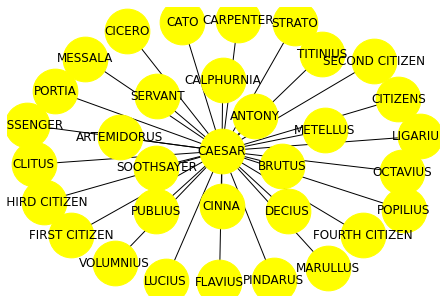

In [103]:
for c in connections:
    G['CAESAR'][c[1]]['weight'] = connections[c]
nx.draw(G, with_labels=True, node_size=2000, node_color='yellow')
for char in charList:
    if ('CAESAR',char) not in connections:
        continue
    print(G.get_edge_data('CAESAR', char))

# What information is contained in the graph and how is it being measured?
- The graph shows a network of the main character of the play Julius Ceasar and his interactions with the other characters. We can see that Ceasar is the center node, in which edges of different weights are being drawn to the rest of the characters. This was measured by looping through all the acts that Caesar was in, and counting the number of times a different character was in that same act. Each occurence of different acts increments the weight of the edge between Caesar and that corresponding character. I used a for loop through the connections dictionary to set the proper weight of each edge: the higher the weight the closer the nodes appear to each other.
# Most important nodes
- Besides the central node which is Ceasar, the other most important nodes seem to be Brutus and Antony, which both have a weight of 4. This would imply that these 2 characters had the most interaction with Ceasar followed by Soothsayer who had an edge weight of 3.